In [ ]:
import wellmap
import pandas as pd
import os
import string
import seaborn as sns
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

New for multiple images in CP file

In [94]:
part_to_folder = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\2024-06-16 Belskaya GA-705 Chlorabucil"

# files = [f for f in listdir(part_to_folder) if isfile(join(part_to_folder, f))]

image_list_path = os.path.join(part_to_folder, "ExpImage.csv")
data_path  = os.path.join(part_to_folder, "ExpWells_plate.csv")

data_raw_df = pd.read_csv(data_path) 
image_list_df = pd.read_csv(image_list_path) 

print(image_list_df)


                                        FileName_RGB  ImageNumber
0  2024-08-16 RZ RD Belskaya GA-705 (Multichannel...            1
1  2024-08-16 RZ RD Belskaya GA-705 3H (Multichan...            2
2  2024-08-16 RZ RD Belskaya GA-705 UV (Multichan...            3
3  2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multic...            4
4  2024-08-16 RZ RD Belskaya GA-705 preUV (Multic...            5
5  2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Mul...            6
6   2024-08-16 RZ RD Chlorambucil (Multichannel).tif            7
7  2024-08-16 RZ RD Chlorambucil 3H (Multichannel...            8


Extract wellmaps and combine into one df with names of the images

C:\Users\Modern\Documents\Biorad\CellProfiler\Results\2024-06-16 Belskaya GA-705 Chlorabucil\2024-08-16 RZ RD Belskaya GA-705 (Multichannel).toml


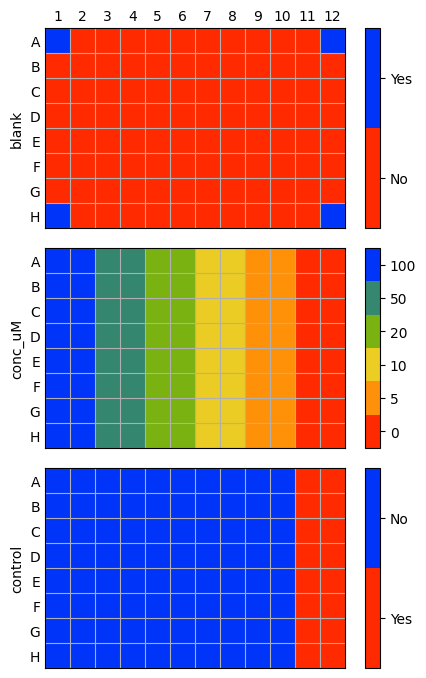

In [95]:
wellmap_path_list = []

for file in os.listdir(part_to_folder):
    if file.endswith(".toml"):
        wellmap_path_list.append(os.path.join(part_to_folder, file))
        # wellmap_path_list.append(file)

print(wellmap_path_list[0])

wellmap_df = wellmap.load(wellmap_path_list[0]) 

wellmap_list = []

for file in wellmap_path_list:
    wellmap_i = wellmap.load(file)
    wellmap_list.append(wellmap_i)

wellmaps_df = pd.concat(wellmap_list, axis=0, ignore_index=True)
# print(wellmaps_df)

wellmap.show(file);
plt.show();

Generating labels for wells

In [96]:
# row_column_df = pd.DataFrame(columns=['row','col'])

row =  list(string.ascii_uppercase[0:8])
column = list(range(1,13))
plate = image_list_df['FileName_RGB'].to_list()

row_column_list = []


for p in plate:
    for c in column:
        for r in row:
            array_i = [r,c]
            row_column_list.append(array_i)

row_column_df = pd.DataFrame(row_column_list, columns = ['row', 'col']) 

print(row_column_df)

    row  col
0     A    1
1     B    1
2     C    1
3     D    1
4     E    1
..   ..  ...
763   D   12
764   E   12
765   F   12
766   G   12
767   H   12

[768 rows x 2 columns]


Add images names to data (thank you CellProfiler for convenience)

Percents

In [ ]:
data_full_df =  pd.merge(data_raw_df, image_list_df, on='ImageNumber') #Data with image names (FileName_RGB)
data_indexed = pd.concat([row_column_df, data_full_df], axis=1, join='inner') #Data with image names (FileName_RGB) and cell indexes (row,col)

data_indexed['col']=data_indexed['col'].astype(str) #Otherwise everything will break

data_plate = pd.merge(data_indexed, wellmaps_df, on=['FileName_RGB','row','col']) #Data with image names (FileName_RGB), cell indexes and wellmap
data_plate[["conc_pc"]] = data_plate[["conc_pc"]].apply(pd.to_numeric)

print(data_plate.columns)


Micromoles

In [52]:
data_full_df =  pd.merge(data_raw_df, image_list_df, on='ImageNumber') #Data with image names (FileName_RGB)
data_indexed = pd.concat([row_column_df, data_full_df], axis=1, join='inner') #Data with image names (FileName_RGB) and cell indexes (row,col)

data_indexed['col']=data_indexed['col'].astype(str) #Otherwise everything will break

data_plate = pd.merge(data_indexed, wellmaps_df, on=['FileName_RGB','row','col']) #Data with image names (FileName_RGB), cell indexes and wellmap
data_plate[["conc_uM"]] = data_plate[["conc_uM"]].apply(pd.to_numeric)

print(data_plate.columns)
# print(data_plate['sample'].unique())

Index(['row', 'col', 'ImageNumber', 'ObjectNumber',
       'Intensity_IntegratedIntensity_OrigGreen',
       'Intensity_IntegratedIntensity_OrigRed',
       'Intensity_MeanIntensity_OrigGreen', 'Intensity_MeanIntensity_OrigRed',
       'Intensity_StdIntensity_OrigGreen', 'Intensity_StdIntensity_OrigRed',
       'FileName_RGB', 'well', 'well0', 'row_i', 'col_j', 'blank', 'control',
       'conc_uM', 'cells', 'uv', 'RZ_incubation', 'substance_incubation',
       'culture_type', 'substance', 'plate_number'],
      dtype='object')


Misceleneous

In [97]:
data_full_df =  pd.merge(data_raw_df, image_list_df, on='ImageNumber') #Data with image names (FileName_RGB)
data_indexed = pd.concat([row_column_df, data_full_df], axis=1, join='inner') #Data with image names (FileName_RGB) and cell indexes (row,col)

data_indexed['col']=data_indexed['col'].astype(str) #Otherwise everything will break

data_plate = pd.merge(data_indexed, wellmaps_df, on=['FileName_RGB','row','col']) #Data with image names (FileName_RGB), cell indexes and wellmap
print(data_plate.columns)

Index(['row', 'col', 'ImageNumber', 'ObjectNumber',
       'Intensity_IntegratedIntensity_OrigGreen',
       'Intensity_IntegratedIntensity_OrigRed',
       'Intensity_MeanIntensity_OrigGreen', 'Intensity_MeanIntensity_OrigRed',
       'Intensity_StdIntensity_OrigGreen', 'Intensity_StdIntensity_OrigRed',
       'FileName_RGB', 'well', 'well0', 'row_i', 'col_j', 'blank', 'conc_uM',
       'cells', 'RZ_incubation', 'substance_incubation', 'culture_type',
       'control', 'plate_number', 'sample'],
      dtype='object')


In [ ]:
print(data_plate['conc_uM'].unique())

In [ ]:
cul_type_list = data_plate['culture_type'].unique()

data_plate_corrected = data_plate.iloc[:0,:].copy()  #Clone of plates df but empty

print(cul_type_list)

for c_type in cul_type_list:
    data_plate_i = data_plate[(data_plate['culture_type'] == c_type)]
    reference_plate = data_plate_i[(data_plate_i['RZ_incubation'] == 0)]
    sample_plate = data_plate_i[(data_plate_i['RZ_incubation'] != 0)]

    reference_plate = reference_plate.reset_index(drop=True)
    sample_plate = sample_plate.reset_index(drop=True)

    mean = reference_plate['Intensity_IntegratedIntensity_OrigGreen'].mean()
    
    reference_plate['Mean_dif'] = reference_plate['Intensity_MeanIntensity_OrigGreen']/mean

    sample_plate['Mean_corr'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/reference_plate['Mean_dif'] 


    data_plate_corrected = data_plate_corrected.append(sample_plate)

print(data_plate_corrected)

In [79]:
sample_list = data_plate['sample'].unique()

data_plate_corrected = data_plate.iloc[:0,:].copy()  #Clone of plates df but empty

print(sample_list)

for sample in sample_list:
    data_plate_i = data_plate[(data_plate['sample'] == sample)]
    reference_plate = data_plate_i[(data_plate_i['RZ_incubation'] == '0H')]
    sample_plate = data_plate_i[(data_plate_i['RZ_incubation'] != '0H')]

    reference_plate = reference_plate.reset_index(drop=True)
    sample_plate = sample_plate.reset_index(drop=True)

    mean = reference_plate['Intensity_IntegratedIntensity_OrigGreen'].mean()
    
    reference_plate['Mean_dif'] = reference_plate['Intensity_MeanIntensity_OrigGreen']/mean

    sample_plate['Mean_corr'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/reference_plate['Mean_dif'] 


    data_plate_corrected = data_plate_corrected.append(sample_plate)



['RA-433' 'control' 'RA-475' 'RA-524' 'RA-519']


C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\3484083257.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\3484083257.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\3484083257.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\3484083257.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [99]:
plate_list = data_plate['plate_number'].unique()
RZ_incubation_list = data_plate['RZ_incubation'].unique()

data_plate_corrected = data_plate.iloc[:0,:].copy()  #Clone of plates df but empty

print(plate_list)

for i in plate_list:
    data_plate_i = data_plate[(data_plate['plate_number'] == i)]

    reference_plate = data_plate_i[(data_plate_i['RZ_incubation'] == '0H')]
    reference_plate = reference_plate.reset_index(drop=True)
    mean = reference_plate['Intensity_IntegratedIntensity_OrigGreen'].mean()
    reference_plate['Mean_dif'] = reference_plate['Intensity_MeanIntensity_OrigGreen']/mean

    for y in RZ_incubation_list:

        sample_plate = data_plate_i[(data_plate_i['RZ_incubation'] == y)]

        sample_plate = sample_plate.reset_index(drop=True)
        
        sample_plate['Mean_corr'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/reference_plate['Mean_dif'] 


        data_plate_corrected = data_plate_corrected.append(sample_plate)

print(data_plate_corrected)

[1 3 2 4]
   row col  ImageNumber  ObjectNumber  \
0    A   1            1             1   
1    B   1            1             2   
2    C   1            1             3   
3    D   1            1             4   
4    E   1            1             5   
..  ..  ..          ...           ...   
91   D  12            8            92   
92   E  12            8            93   
93   F  12            8            94   
94   G  12            8            95   
95   H  12            8            96   

    Intensity_IntegratedIntensity_OrigGreen  \
0                                 70.325493   
1                                 64.788238   
2                                 67.541179   
3                                 67.125493   
4                                 66.003924   
..                                      ...   
91                               333.129424   
92                               443.105895   
93                               410.772562   
94                         

C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\2839083871.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\2839083871.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\2839083871.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_plate_corrected = data_plate_corrected.append(sample_plate)
C:\Users\Modern\AppData\Local\Temp\ipykernel_16552\2839083871.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Modern\AppData\Local\Package

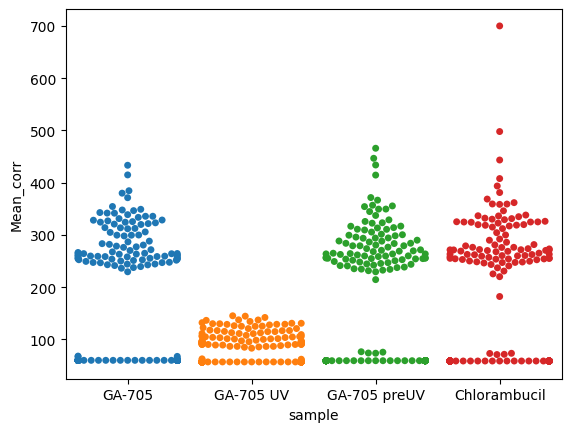

In [100]:
ay = sns.swarmplot(data=data_plate_corrected, x="sample", y="Mean_corr")

C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


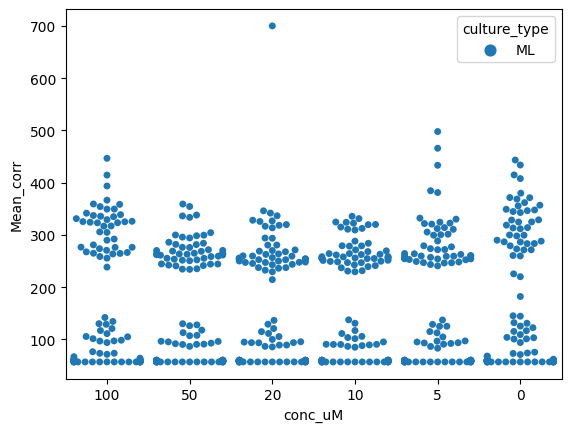

In [101]:
ay = sns.swarmplot(data=data_plate_corrected, x="conc_uM", y="Mean_corr", hue = 'culture_type')

In [ ]:
ay = sns.swarmplot(data=data_plate_corrected, x="RZ_incubation", y="Intensity_MeanIntensity_OrigGreen", hue = 'sph_per_well')

print(data_plate['sph_per_well'].unique())

In [102]:
blank_array = []

plate_list = data_plate_corrected['FileName_RGB'].unique()
print(plate_list)

for p in plate_list:
    blank_p = data_plate_corrected[(data_plate_corrected['blank'] == 'Yes') & 
                                   (data_plate_corrected['FileName_RGB'] == p)].loc[:,'Mean_corr'].mean()
    
    blank_std_p = data_plate_corrected[(data_plate_corrected['blank'] == 'Yes') 
                                       & (data_plate_corrected['FileName_RGB'] == p)].loc[:,'Mean_corr'].std()

    bc_array_i = [blank_p, blank_std_p ,p]

    print(bc_array_i)

    blank_array.append(bc_array_i)

    blank_df = pd.DataFrame(blank_array, columns = ['blank_mean','blank_std','FileName_RGB']) 

data_plate_with_blank_values = pd.merge(data_plate_corrected, blank_df, on=['FileName_RGB'])



['2024-08-16 RZ RD Belskaya GA-705 (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 3H (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 UV (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 preUV (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Multichannel).tif'
 '2024-08-16 RZ RD Chlorambucil (Multichannel).tif'
 '2024-08-16 RZ RD Chlorambucil 3H (Multichannel).tif']
[60.088482539688506, 0.0, '2024-08-16 RZ RD Belskaya GA-705 (Multichannel).tif']
[66.77247332692586, 1.7355645523299799, '2024-08-16 RZ RD Belskaya GA-705 3H (Multichannel).tif']
[57.04342517099576, 0.0, '2024-08-16 RZ RD Belskaya GA-705 UV (Multichannel).tif']
[61.86808961300262, 0.8728403260343374, '2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multichannel).tif']
[59.3875021051014, 0.0, '2024-08-16 RZ RD Belskaya GA-705 preUV (Multichannel).tif']
[75.00021780485602, 1.3314139047877416, '2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Mul

In [103]:
blank_array = []

plate_list = data_plate_corrected['FileName_RGB'].unique()
print(plate_list)

for p in plate_list:
    blank_p = data_plate_corrected[(data_plate_corrected['blank'] == 'Yes') & 
                                   (data_plate_corrected['FileName_RGB'] == p)].loc[:,'Mean_corr'].mean()
    
    blank_std_p = data_plate_corrected[(data_plate_corrected['blank'] == 'Yes') 
                                       & (data_plate_corrected['FileName_RGB'] == p)].loc[:,'Mean_corr'].std()

    bc_array_i = [blank_p, blank_std_p ,p]

    print(bc_array_i)

    blank_array.append(bc_array_i)

    blank_df = pd.DataFrame(blank_array, columns = ['blank_mean','blank_std','FileName_RGB']) 

data_plate_with_blank_values = pd.merge(data_plate_corrected, blank_df, on=['FileName_RGB'])



['2024-08-16 RZ RD Belskaya GA-705 (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 3H (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 UV (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 preUV (Multichannel).tif'
 '2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Multichannel).tif'
 '2024-08-16 RZ RD Chlorambucil (Multichannel).tif'
 '2024-08-16 RZ RD Chlorambucil 3H (Multichannel).tif']
[60.088482539688506, 0.0, '2024-08-16 RZ RD Belskaya GA-705 (Multichannel).tif']
[66.77247332692586, 1.7355645523299799, '2024-08-16 RZ RD Belskaya GA-705 3H (Multichannel).tif']
[57.04342517099576, 0.0, '2024-08-16 RZ RD Belskaya GA-705 UV (Multichannel).tif']
[61.86808961300262, 0.8728403260343374, '2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multichannel).tif']
[59.3875021051014, 0.0, '2024-08-16 RZ RD Belskaya GA-705 preUV (Multichannel).tif']
[75.00021780485602, 1.3314139047877416, '2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Mul

In [104]:
data_plate_with_blank_values['Green_blanked'] = data_plate_with_blank_values['Mean_corr'] - data_plate_with_blank_values['blank_mean']

data_plate_wo_blank = data_plate_with_blank_values[data_plate_with_blank_values.blank == 'No'].copy() #dataframe without blank

control_array = []

for p in plate_list:
    control_p = data_plate_wo_blank[(data_plate_wo_blank['control'] == 'Yes') & 
                                    (data_plate_wo_blank['FileName_RGB'] == p)].loc[:,'Green_blanked'].mean()

    control_std_p = data_plate_wo_blank[(data_plate_wo_blank['control'] == 'Yes') & 
                                        (data_plate_wo_blank['FileName_RGB'] == p)].loc[:,'Green_blanked'].std()
    

    ctr_array_i = [control_p, control_std_p ,p]


    control_array.append(ctr_array_i)

    control_df = pd.DataFrame(control_array, columns = ['control_mean','control_std','FileName_RGB']) 

print(control_df)

data_plate_with_control = pd.merge(data_plate_wo_blank, control_df, on=['FileName_RGB'])

data_plate_with_control['Green_relative'] = data_plate_with_control['Green_blanked']/data_plate_with_control['control_mean']*100


   control_mean   control_std  \
0  1.015061e-15  2.580240e-15   
1  2.671902e+02  3.811889e+01   
2 -5.075305e-16  3.372457e-15   
3  5.575067e+01  1.649990e+01   
4 -1.015061e-15  3.798011e-15   
5  2.439050e+02  4.880623e+01   
6  5.075305e-16  3.372457e-15   
7  2.336370e+02  7.377042e+01   

                                        FileName_RGB  
0  2024-08-16 RZ RD Belskaya GA-705 (Multichannel...  
1  2024-08-16 RZ RD Belskaya GA-705 3H (Multichan...  
2  2024-08-16 RZ RD Belskaya GA-705 UV (Multichan...  
3  2024-08-16 RZ RD Belskaya GA-705 UV 3H (Multic...  
4  2024-08-16 RZ RD Belskaya GA-705 preUV (Multic...  
5  2024-08-16 RZ RD Belskaya GA-705 preUV 3H (Mul...  
6   2024-08-16 RZ RD Chlorambucil (Multichannel).tif  
7  2024-08-16 RZ RD Chlorambucil 3H (Multichannel...  


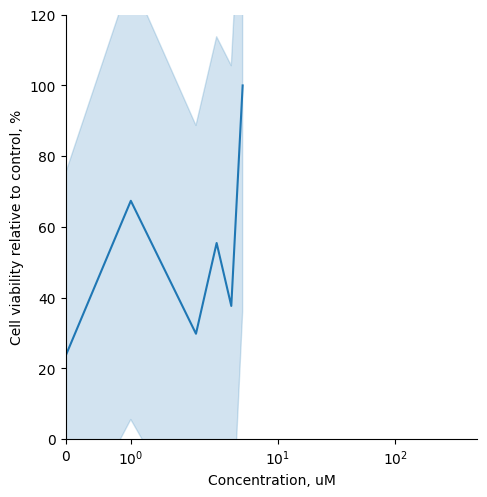

In [105]:
data_plate_with_control['Green_relative'] = data_plate_with_control['Green_blanked']/data_plate_with_control['control_mean']*100

ax = sns.relplot(data=data_plate_with_control, x="conc_uM", y="Green_relative",  kind="line")

ax.set(xscale="symlog")

ax.set(xlim=(0, 500),ylim = (0,120))

ax.set(xlabel='Concentration, uM', ylabel='Cell viability relative to control, %')

plt.show()


In [108]:
data_plate_with_control['Green_relative'] = data_plate_with_control['Green_blanked']/data_plate_with_control['control_mean']*100

ax = sns.relplot(data=data_plate_with_control, x="conc_pc", y="Green_relative", hue = 'culture_type',  kind="line")

# ax.set(xscale="symlog")

# ax.set(xlim=(0, 10),ylim = (0,120))

ax.set(xlabel='Concentration, pc', ylabel='Cell viability relative to control, %')

plt.show()

ValueError: Could not interpret value `conc_pc` for parameter `x`

[(-1.0, 3.5), (0.0, 130.0)]

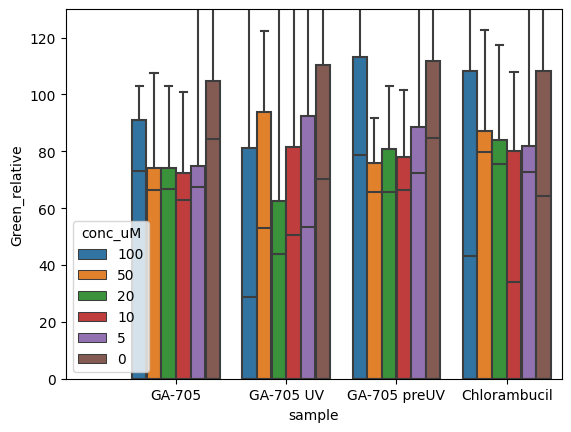

In [107]:
ax = sns.boxplot(data=data_plate_with_control, x="sample", y="Green_relative", hue = 'conc_uM')


ax.set(xlim=(-1, None),ylim = (0,130))

In [ ]:
ax = sns.boxplot(data=data_plate_with_control, x="conc_pc", y="Green_relative", hue = 'culture_type')


ax.set(xlim=(-1, None),ylim = (0,130))

In [ ]:
file_name = part_to_folder + '/data_processed.csv'

data_plate_with_control.to_csv(file_name)